In [75]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import librosa

folder = "data/multisrc"
# folder = "data/240625/45_2/mono_minmax_no_silence"
sr = 48000

# bottom, top
sig1, _ = librosa.load(folder + "/" + "sig1F.wav", sr=None)
sig2, _ = librosa.load(folder + "/" + "sig2F.wav", sr=None)


n = sig1.size + sig2.size

SIG1 = np.fft.rfft(sig1, n=n)
SIG2 = np.fft.rfft(sig2, n=n)

R = SIG1 * np.conj(SIG2)
cc = np.fft.irfft(R / np.abs(R))
    
sample_delay = 0
max_shift = n // 2
cc = np.concatenate((cc[-max_shift:], cc[:max_shift]))
sample_delay = np.argmax(cc) - max_shift
tdoa = sample_delay / float(sr)


distance = 0.161
sound_speed = 343.2
doa = np.arccos(tdoa * sound_speed / distance)

# Find peaks in the cross-correlation
peaks, _ = find_peaks(cc)
sorted_peaks = np.argsort(cc[peaks])[-2:]  # Get indices of the two highest peaks
peak_values = peaks[sorted_peaks]
print(f"Azimuth 1: {np.degrees(np.arccos((peak_values[0] - len(cc)//2) / float(sr) * sound_speed / distance)) - 90:.4f}")
print(f"Azimuth 2: {np.degrees(np.arccos((peak_values[1] - len(cc)//2) / float(sr) * sound_speed / distance)) - 90:.4f}")

Azimuth 1: -41.7705
Azimuth 2: 49.0227


### Female-Male Speakers

#### GCC-PHAT plot

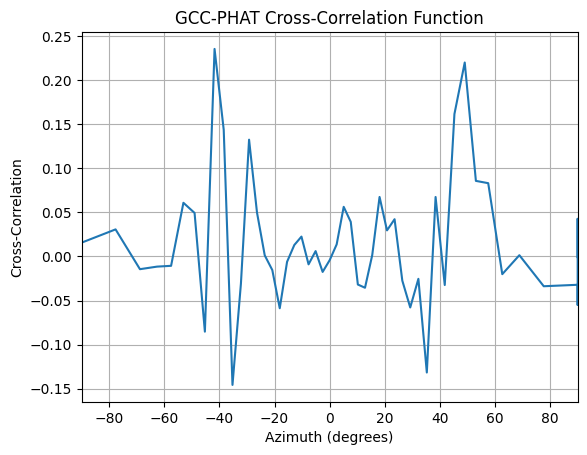

In [66]:
max_lag = cc.size // 2
lags = np.arange(-max_lag, max_lag) / float(sr)
clipped_lags = np.clip(lags * sound_speed / distance, -1, 1)
angles = np.degrees(np.arccos(clipped_lags)) - 90

plt.plot(angles, cc)
plt.title('GCC-PHAT Cross-Correlation Function')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Cross-Correlation')
plt.xlim(-90, 90)
plt.grid(True)
plt.show()

#### CPS

**Convert Frequency bin Index to Specific Frequency**
- $Specific \, Frequency = \frac{Frequency \, bin \, Index}{FFT \, point} \cdot Sampling \, Rate = Frequency \, bin \, Index \cdot Frequency \, Resolution$

In [71]:
# frequency array
# n is 1017600, fft result is (1017600/2)+1=508801
frequency = np.fft.rfftfreq(n, d=1/sr)

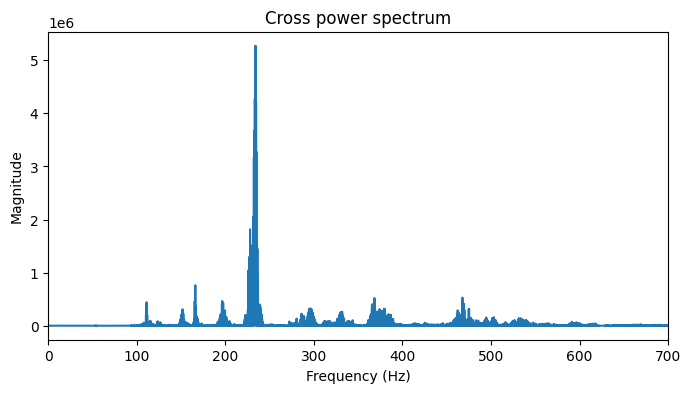

In [74]:
plt.figure(figsize=(8,4))
plt.title("Cross power spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0,700)
plt.plot(frequency, np.abs(R))
plt.show()

### Female Speaker (same)

#### GCC-PHAT plot

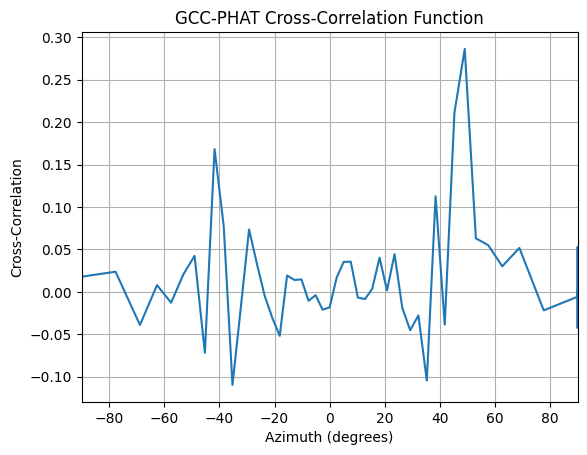

In [76]:
max_lag = cc.size // 2
lags = np.arange(-max_lag, max_lag) / float(sr)
clipped_lags = np.clip(lags * sound_speed / distance, -1, 1)
angles = np.degrees(np.arccos(clipped_lags)) - 90

plt.plot(angles, cc)
plt.title('GCC-PHAT Cross-Correlation Function')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Cross-Correlation')
plt.xlim(-90, 90)
plt.grid(True)
plt.show()

#### CPS

**Convert Frequency bin Index to Specific Frequency**
- $Specific \, Frequency = \frac{Frequency \, bin \, Index}{FFT \, point} \cdot Sampling \, Rate = Frequency \, bin \, Index \cdot Frequency \, Resolution$

In [79]:
# frequency array
# n is 1017600, fft result is (1017600/2)+1=508801
frequency = np.fft.rfftfreq(n, d=1/sr)

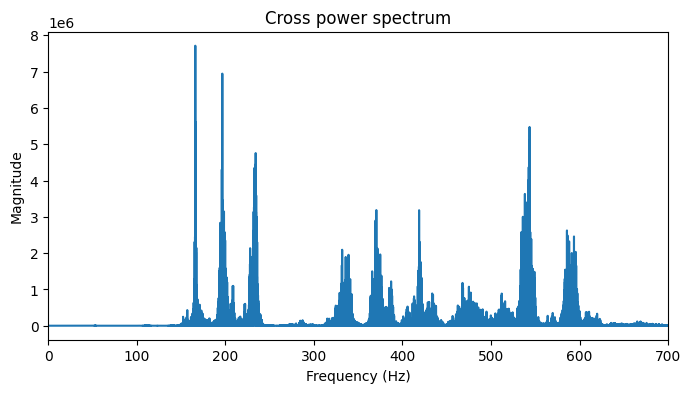

In [83]:
plt.figure(figsize=(8,4))
plt.title("Cross power spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0,700)
plt.plot(frequency, np.abs(R))
plt.show()